In [48]:

%load_ext autoreload
%autoreload 2
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from urllib.request import urlopen
import requests
import json
import os
os.chdir("/zata/zippy/ramirezc/splice-model-benchmark")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Make a dataframe with the experiment and bio_tech_rep as the key and the value as the biosample id

In [49]:
response = requests.get('https://www.encodeproject.org/search/?type=Experiment&format=json&limit=all', headers={'accept': 'application/json'})
data = response.json()

with open('encode_experiments.json', 'w') as f:
    json.dump(data, f, indent=4)

In [50]:
with open('encode_experiments.json', 'r') as f:
    data = json.load(f)

graph = data.get('@graph')

In [109]:
biosample_dict = {
    'Experiment accession': [],
    'Biosample accession': [],
    'Technical replicate(s)': [],
}

for experiment_json in graph:
    experiment = experiment_json.get('accession')
    for replicate in experiment_json.get('replicates', []):
        biosample = replicate.get('library', {}).get('biosample', {}).get('accession')
        technical_replicates = str(replicate.get('biological_replicate_number')) + '_' + str(replicate.get('technical_replicate_number'))
        biosample_dict['Experiment accession'].append(experiment)
        biosample_dict['Biosample accession'].append(biosample)
        biosample_dict['Technical replicate(s)'].append(technical_replicates)
   
biosample_df = pl.from_dict(biosample_dict)
 

Pull encode matrix parquet from previous work

In [110]:
encode_matrix = pl.read_parquet('/zata/zippy/ramirezc/static_files/encode_metadata.parquet')
display(encode_matrix)

File accession,File format,File type,File format type,Output type,File assembly,Experiment accession,Assay,Donor(s),Biosample term id,Biosample term name,Biosample type,Biosample organism,Biosample treatments,Biosample treatments amount,Biosample treatments duration,Biosample genetic modifications methods,Biosample genetic modifications categories,Biosample genetic modifications targets,Biosample genetic modifications gene targets,Biosample genetic modifications site coordinates,Biosample genetic modifications zygosity,Experiment target,Library made from,Library depleted in,Library extraction method,Library lysis method,Library crosslinking method,Library strand specific,Experiment date released,Project,RBNS protein concentration,Library fragmentation method,Library size range,Biological replicate(s),Technical replicate(s),Read length,Mapped read length,Run type,Paired end,Paired with,Index of,Derived from,Size,Lab,md5sum,dbxrefs,File download URL,Genome annotation,Platform,Controlled by,File Status,s3_uri,Azure URL,File analysis title,File analysis status,Audit WARNING,Audit NOT_COMPLIANT,Audit ERROR
str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,i64,i64,str,i64,str,str,str,i64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""ENCFF745DFQ""","""fastq""","""fastq""",null,"""reads""",null,"""ENCSR368EZK""","""TF ChIP-seq""","""/human-donors/ENCDO305PTK/""","""EFO:0030018""","""BLaER1""","""cell line""","""Homo sapiens""","""Interleukin-3, CSF1, 17β-estra…","""100 nM, 10 nM""",null,null,null,null,null,null,null,"""Cebpa-rat""","""DNA""",null,null,null,null,null,"""2022-05-10""","""community""",null,"""shearing (Covaris generic)""",null,"""1""","""1_1""",51,null,"""single-ended""",null,null,null,null,955162543,"""Roderic Guigo, CRG""","""b174fdfe31eaa397d729d42add2e93…","""SRA:SRR28101656""","""https://www.encodeproject.org/…",null,"""Illumina HiSeq 2000""","""/files/ENCFF392GXL/""","""released""","""s3://encode-public/2022/01/27/…","""https://datasetencode.blob.cor…",null,null,null,null,null
"""ENCFF461LEI""","""fastq""","""fastq""",null,"""reads""",null,"""ENCSR368EZK""","""TF ChIP-seq""","""/human-donors/ENCDO305PTK/""","""EFO:0030018""","""BLaER1""","""cell line""","""Homo sapiens""","""Interleukin-3, CSF1, 17β-estra…","""100 nM, 10 nM""",null,null,null,null,null,null,null,"""Cebpa-rat""","""DNA""",null,null,null,null,null,"""2022-05-10""","""community""",null,"""shearing (Covaris generic)""",null,"""2""","""2_1""",51,null,"""single-ended""",null,null,null,null,852026102,"""Roderic Guigo, CRG""","""406fd99e7ab8c0a3c8c9c337f06d32…","""SRA:SRR28101655""","""https://www.encodeproject.org/…",null,"""Illumina HiSeq 2000""","""/files/ENCFF159DAO/""","""released""","""s3://encode-public/2022/01/27/…","""https://datasetencode.blob.cor…",null,null,null,null,null
"""ENCFF780TCU""","""bam""","""bam""",null,"""alignments""","""GRCh38""","""ENCSR368EZK""","""TF ChIP-seq""","""/human-donors/ENCDO305PTK/""","""EFO:0030018""","""BLaER1""","""cell line""","""Homo sapiens""","""Interleukin-3, CSF1, 17β-estra…","""100 nM, 10 nM""",null,null,null,null,null,null,null,"""Cebpa-rat""","""DNA""",null,null,null,null,null,"""2022-05-10""","""community""",null,"""shearing (Covaris generic)""",null,"""1""","""1_1""",null,50,null,null,null,null,"""/files/GRCh38_no_alt_analysis_…",989833154,"""Roderic Guigo, CRG""","""b79ae9575df4a7ba8cfc16ee68d6a6…",null,"""https://www.encodeproject.org/…",null,null,null,"""released""","""s3://encode-public/2022/01/27/…","""https://datasetencode.blob.cor…","""Lab custom GRCh38""","""released""",null,null,null
"""ENCFF429VEI""","""bigWig""","""bigWig""",null,"""signal p-value""","""GRCh38""","""ENCSR368EZK""","""TF ChIP-seq""","""/human-donors/ENCDO305PTK/""","""EFO:0030018""","""BLaER1""","""cell line""","""Homo sapiens""","""Interleukin-3, CSF1, 17β-estra…","""100 nM, 10 nM""",null,null,null,null,null,null,null,

Filter to narrow down experiments

In [111]:
rna_seq = encode_matrix.filter(
    pl.col('Assay').is_in(['long read RNA-seq', 'total RNA-seq']),
    pl.col('File format') == 'bam',
    pl.col('Output type') == 'alignments',
    pl.col('File assembly') == 'GRCh38',
    pl.col('File analysis title').str.contains('ENCODE4'),
)
display(rna_seq)

multiple_analysis_title = (
    rna_seq
    .group_by('Experiment accession')
    .agg(
        pl.col('File analysis title').unique().alias('analysis_titles')
    ).filter(
        pl.col('analysis_titles').list.len() > 1
    ).sort('Experiment accession')
)
display(multiple_analysis_title)

first_analysis_title = (
    rna_seq
    .sort('Experiment accession', 'File analysis title', descending=True) # Ensures that the most recent analysis title is first
    .group_by('Experiment accession')
    .agg(
        pl.col('File analysis title').first().alias('first_title')
    )
)
print(first_analysis_title.filter(pl.col('Experiment accession') == 'ENCSR194YUY'))
display(first_analysis_title)

one_file_analysis_title = (
    rna_seq
    .join(
        first_analysis_title, 
        on='Experiment accession'
    )
    .filter(
        pl.col('File analysis title') == pl.col('first_title')
    )
    .drop('first_title')
)
display(one_file_analysis_title)

print(rna_seq['File analysis title'].value_counts())
print(one_file_analysis_title['File analysis title'].value_counts())

File accession,File format,File type,File format type,Output type,File assembly,Experiment accession,Assay,Donor(s),Biosample term id,Biosample term name,Biosample type,Biosample organism,Biosample treatments,Biosample treatments amount,Biosample treatments duration,Biosample genetic modifications methods,Biosample genetic modifications categories,Biosample genetic modifications targets,Biosample genetic modifications gene targets,Biosample genetic modifications site coordinates,Biosample genetic modifications zygosity,Experiment target,Library made from,Library depleted in,Library extraction method,Library lysis method,Library crosslinking method,Library strand specific,Experiment date released,Project,RBNS protein concentration,Library fragmentation method,Library size range,Biological replicate(s),Technical replicate(s),Read length,Mapped read length,Run type,Paired end,Paired with,Index of,Derived from,Size,Lab,md5sum,dbxrefs,File download URL,Genome annotation,Platform,Controlled by,File Status,s3_uri,Azure URL,File analysis title,File analysis status,Audit WARNING,Audit NOT_COMPLIANT,Audit ERROR
str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,i64,i64,str,i64,str,str,str,i64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""ENCFF394BGT""","""bam""","""bam""",null,"""alignments""","""GRCh38""","""ENCSR719GYP""","""total RNA-seq""","""/human-donors/ENCDO000AAZ/""","""EFO:0001086""","""A549""","""cell line""","""Homo sapiens""","""ZK216348""","""1 μM""","""4 hour""",null,null,null,null,null,null,null,"""RNA""",null,"""Qiagen RNA extraction""",null,null,"""reverse""","""2022-07-14""","""ENCODE""",null,null,"""200-300""","""1""","""1_1""",null,101,null,null,null,null,"""/files/ENCFF598IDH/, /files/EN…",2232290718,"""ENCODE Processing Pipeline""","""855124eb933f78b5a90141030dfcc5…",null,"""https://www.encodeproject.org/…","""V29""",null,null,"""released""","""s3://encode-public/2022/05/12/…","""https://datasetencode.blob.cor…","""ENCODE4 v1.2.3 GRCh38 V29""","""released""","""low read depth""",null,null
"""ENCFF732EIU""","""bam""","""bam""",null,"""alignments""","""GRCh38""","""ENCSR719GYP""","""total RNA-seq""","""/human-donors/ENCDO000AAZ/""","""EFO:0001086""","""A549""","""cell line""","""Homo sapiens""","""ZK216348""","""1 μM""","""4 hour""",null,null,null,null,null,null,null,"""RNA""",null,"""Qiagen RNA extraction""",null,null,"""reverse""","""2022-07-14""","""ENCODE""",null,null,"""200-300""","""4""","""4_1""",null,101,null,null,null,null,"""/files/ENCFF037JRL/, /files/EN…",5560491909,"""ENCODE Processing Pipeline""","""8cfeaf8d18ea764e81bb30f4ee9471…",null,"""https://www.encodeproject.org/…","""V29""",null,null,"""released""","""s3://encode-public/2022/05/12/…","""https://datasetencode.blob.cor…","""ENCODE4 v1.2.3 GRCh38 V29""","""released""","""low read depth""",null,null
"""ENCFF041NNT""","""bam""","""bam""",null,"""alignments""","""GRCh38""","""ENCSR719GYP""","""total RNA-seq""","""/human-donors/ENCDO000AAZ/""","""EFO:0001086""","""A549""","""cell line""","""Homo sapiens""","""ZK216348""","""1 μM""","""4 hour""",null,null,null,null,null,null,null,"""RNA""",null,"""Qiagen RNA extraction""",null,null,"""reverse""","""2022-07-14""","""ENCODE""",null,null,"""200-300""","""5""","""5_1""",null,101,null,null,null,null,"""/files/ENCFF469TPQ/, /files/EN…",3207336205,"""ENCODE Processing Pipeline""","""43cf4df3add36a70c0209916ba4a09…",null,"""https://www.encodeproject.org/…","""V29""",null,null,"""released""","""s3://encode-public/2022/05/12/…","""https://datasetencode.blob.cor…","""ENCODE4 v1.2.3 GRCh38 V29""","""released""","""low read depth""",null,null
"""ENCFF729MYF""","""bam""","""bam""",null,"""alignments""","""GRCh38""","""ENCSR719GYP""","""total RNA-seq""","""/human-donors/ENCDO000AAZ/""","""EFO:0001086""","""A549""","""cell line""","""Homo sapiens""","""ZK216348""","""1 μM""","""4 hour""",null,null,null,null,nu

Experiment accession,analysis_titles
str,list[str]
"""ENCSR194YUY""","[""ENCODE4 v2.0.0 GRCh38 V29"", ""ENCODE4 GRCh38 V29""]"
"""ENCSR293MOX""","[""ENCODE4 v2.0.0 GRCh38 V29"", ""ENCODE4 GRCh38 V29""]"
"""ENCSR426KOP""","[""ENCODE4 GRCh38 V29"", ""ENCODE4 v2.0.0 GRCh38 V29""]"
"""ENCSR587WPR""","[""ENCODE4 GRCh38 V29"", ""ENCODE4 v2.0.0 GRCh38 V29""]"
"""ENCSR589FUJ""","[""ENCODE4 GRCh38 V29"", ""ENCODE4 v2.0.0 GRCh38 V29""]"
…,…
"""ENCSR746ITG""","[""ENCODE4 GRCh38 V29"", ""ENCODE4 v2.0.0 GRCh38 V29""]"
"""ENCSR803XXZ""","[""ENCODE4 v2.0.0 GRCh38 V29"", ""ENCODE4 GRCh38 V29""]"
"""ENCSR834DQL""","[""ENCODE4 GRCh38 V29"", ""ENCODE4 v2.0.0 GRCh38 V29""]"


shape: (1, 2)
┌──────────────────────┬───────────────────────────┐
│ Experiment accession ┆ first_title               │
│ ---                  ┆ ---                       │
│ str                  ┆ str                       │
╞══════════════════════╪═══════════════════════════╡
│ ENCSR194YUY          ┆ ENCODE4 v2.0.0 GRCh38 V29 │
└──────────────────────┴───────────────────────────┘


Experiment accession,first_title
str,str
"""ENCSR000AFA""","""ENCODE4 v1.2.3 GRCh38 V29"""
"""ENCSR924MSZ""","""ENCODE4 v1.2.1 GRCh38 V29"""
"""ENCSR182CBU""","""ENCODE4 v1.2.1 GRCh38 V29"""
"""ENCSR694AWV""","""ENCODE4 v1.2.3 GRCh38 V29"""
"""ENCSR790BBE""","""ENCODE4 v1.2.4 GRCh38 V29"""
…,…
"""ENCSR198QAJ""","""ENCODE4 v1.2.3 GRCh38 V29"""
"""ENCSR159ICU""","""ENCODE4 v2.0.0 GRCh38 V29"""
"""ENCSR475TVN""","""ENCODE4 v1.2.4 GRCh38 V29"""


File accession,File format,File type,File format type,Output type,File assembly,Experiment accession,Assay,Donor(s),Biosample term id,Biosample term name,Biosample type,Biosample organism,Biosample treatments,Biosample treatments amount,Biosample treatments duration,Biosample genetic modifications methods,Biosample genetic modifications categories,Biosample genetic modifications targets,Biosample genetic modifications gene targets,Biosample genetic modifications site coordinates,Biosample genetic modifications zygosity,Experiment target,Library made from,Library depleted in,Library extraction method,Library lysis method,Library crosslinking method,Library strand specific,Experiment date released,Project,RBNS protein concentration,Library fragmentation method,Library size range,Biological replicate(s),Technical replicate(s),Read length,Mapped read length,Run type,Paired end,Paired with,Index of,Derived from,Size,Lab,md5sum,dbxrefs,File download URL,Genome annotation,Platform,Controlled by,File Status,s3_uri,Azure URL,File analysis title,File analysis status,Audit WARNING,Audit NOT_COMPLIANT,Audit ERROR
str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,i64,i64,str,i64,str,str,str,i64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""ENCFF394BGT""","""bam""","""bam""",null,"""alignments""","""GRCh38""","""ENCSR719GYP""","""total RNA-seq""","""/human-donors/ENCDO000AAZ/""","""EFO:0001086""","""A549""","""cell line""","""Homo sapiens""","""ZK216348""","""1 μM""","""4 hour""",null,null,null,null,null,null,null,"""RNA""",null,"""Qiagen RNA extraction""",null,null,"""reverse""","""2022-07-14""","""ENCODE""",null,null,"""200-300""","""1""","""1_1""",null,101,null,null,null,null,"""/files/ENCFF598IDH/, /files/EN…",2232290718,"""ENCODE Processing Pipeline""","""855124eb933f78b5a90141030dfcc5…",null,"""https://www.encodeproject.org/…","""V29""",null,null,"""released""","""s3://encode-public/2022/05/12/…","""https://datasetencode.blob.cor…","""ENCODE4 v1.2.3 GRCh38 V29""","""released""","""low read depth""",null,null
"""ENCFF732EIU""","""bam""","""bam""",null,"""alignments""","""GRCh38""","""ENCSR719GYP""","""total RNA-seq""","""/human-donors/ENCDO000AAZ/""","""EFO:0001086""","""A549""","""cell line""","""Homo sapiens""","""ZK216348""","""1 μM""","""4 hour""",null,null,null,null,null,null,null,"""RNA""",null,"""Qiagen RNA extraction""",null,null,"""reverse""","""2022-07-14""","""ENCODE""",null,null,"""200-300""","""4""","""4_1""",null,101,null,null,null,null,"""/files/ENCFF037JRL/, /files/EN…",5560491909,"""ENCODE Processing Pipeline""","""8cfeaf8d18ea764e81bb30f4ee9471…",null,"""https://www.encodeproject.org/…","""V29""",null,null,"""released""","""s3://encode-public/2022/05/12/…","""https://datasetencode.blob.cor…","""ENCODE4 v1.2.3 GRCh38 V29""","""released""","""low read depth""",null,null
"""ENCFF041NNT""","""bam""","""bam""",null,"""alignments""","""GRCh38""","""ENCSR719GYP""","""total RNA-seq""","""/human-donors/ENCDO000AAZ/""","""EFO:0001086""","""A549""","""cell line""","""Homo sapiens""","""ZK216348""","""1 μM""","""4 hour""",null,null,null,null,null,null,null,"""RNA""",null,"""Qiagen RNA extraction""",null,null,"""reverse""","""2022-07-14""","""ENCODE""",null,null,"""200-300""","""5""","""5_1""",null,101,null,null,null,null,"""/files/ENCFF469TPQ/, /files/EN…",3207336205,"""ENCODE Processing Pipeline""","""43cf4df3add36a70c0209916ba4a09…",null,"""https://www.encodeproject.org/…","""V29""",null,null,"""released""","""s3://encode-public/2022/05/12/…","""https://datasetencode.blob.cor…","""ENCODE4 v1.2.3 GRCh38 V29""","""released""","""low read depth""",null,null
"""ENCFF729MYF""","""bam""","""bam""",null,"""alignments""","""GRCh38""","""ENCSR719GYP""","""total RNA-seq""","""/human-donors/ENCDO000AAZ/""","""EFO:0001086""","""A549""","""cell line""","""Homo sapiens""","""ZK216348""","""1 μM""","""4 hour""",null,null,null,null,nu

shape: (6, 2)
┌───────────────────────────┬───────┐
│ File analysis title       ┆ count │
│ ---                       ┆ ---   │
│ str                       ┆ u32   │
╞═══════════════════════════╪═══════╡
│ ENCODE4 v1.2.1 GRCh38 V29 ┆ 157   │
│ ENCODE4 v1.2.4 GRCh38 V29 ┆ 98    │
│ ENCODE4 v1.2.3 GRCh38 V29 ┆ 680   │
│ ENCODE4 v2.0.0 GRCh38 V29 ┆ 163   │
│ ENCODE4 v1.1.0 GRCh38 V29 ┆ 78    │
│ ENCODE4 GRCh38 V29        ┆ 17    │
└───────────────────────────┴───────┘
shape: (5, 2)
┌───────────────────────────┬───────┐
│ File analysis title       ┆ count │
│ ---                       ┆ ---   │
│ str                       ┆ u32   │
╞═══════════════════════════╪═══════╡
│ ENCODE4 v1.2.4 GRCh38 V29 ┆ 98    │
│ ENCODE4 v1.2.3 GRCh38 V29 ┆ 679   │
│ ENCODE4 v1.1.0 GRCh38 V29 ┆ 78    │
│ ENCODE4 v1.2.1 GRCh38 V29 ┆ 157   │
│ ENCODE4 v2.0.0 GRCh38 V29 ┆ 163   │
└───────────────────────────┴───────┘


Join on biosample df on rna_seq df

In [112]:
print(f'Shape before: {one_file_analysis_title.shape}')
with_biosample_acc = one_file_analysis_title.join(biosample_df, on=['Experiment accession', 'Technical replicate(s)'], how='inner')
drop_no_accession = with_biosample_acc.drop_nulls(subset=['Biosample accession'])
print(f'Shape after: {drop_no_accession.shape}')
display(drop_no_accession)

Shape before: (1175, 59)
Shape after: (1175, 60)


File accession,File format,File type,File format type,Output type,File assembly,Experiment accession,Assay,Donor(s),Biosample term id,Biosample term name,Biosample type,Biosample organism,Biosample treatments,Biosample treatments amount,Biosample treatments duration,Biosample genetic modifications methods,Biosample genetic modifications categories,Biosample genetic modifications targets,Biosample genetic modifications gene targets,Biosample genetic modifications site coordinates,Biosample genetic modifications zygosity,Experiment target,Library made from,Library depleted in,Library extraction method,Library lysis method,Library crosslinking method,Library strand specific,Experiment date released,Project,RBNS protein concentration,Library fragmentation method,Library size range,Biological replicate(s),Technical replicate(s),Read length,Mapped read length,Run type,Paired end,Paired with,Index of,Derived from,Size,Lab,md5sum,dbxrefs,File download URL,Genome annotation,Platform,Controlled by,File Status,s3_uri,Azure URL,File analysis title,File analysis status,Audit WARNING,Audit NOT_COMPLIANT,Audit ERROR,Biosample accession
str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,i64,i64,str,i64,str,str,str,i64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""ENCFF394BGT""","""bam""","""bam""",null,"""alignments""","""GRCh38""","""ENCSR719GYP""","""total RNA-seq""","""/human-donors/ENCDO000AAZ/""","""EFO:0001086""","""A549""","""cell line""","""Homo sapiens""","""ZK216348""","""1 μM""","""4 hour""",null,null,null,null,null,null,null,"""RNA""",null,"""Qiagen RNA extraction""",null,null,"""reverse""","""2022-07-14""","""ENCODE""",null,null,"""200-300""","""1""","""1_1""",null,101,null,null,null,null,"""/files/ENCFF598IDH/, /files/EN…",2232290718,"""ENCODE Processing Pipeline""","""855124eb933f78b5a90141030dfcc5…",null,"""https://www.encodeproject.org/…","""V29""",null,null,"""released""","""s3://encode-public/2022/05/12/…","""https://datasetencode.blob.cor…","""ENCODE4 v1.2.3 GRCh38 V29""","""released""","""low read depth""",null,null,"""ENCBS768OOX"""
"""ENCFF566YER""","""bam""","""bam""",null,"""alignments""","""GRCh38""","""ENCSR719GYP""","""total RNA-seq""","""/human-donors/ENCDO000AAZ/""","""EFO:0001086""","""A549""","""cell line""","""Homo sapiens""","""ZK216348""","""1 μM""","""4 hour""",null,null,null,null,null,null,null,"""RNA""",null,"""Qiagen RNA extraction""",null,null,"""reverse""","""2022-07-14""","""ENCODE""",null,null,"""200-300""","""3""","""3_1""",null,101,null,null,null,null,"""/files/ENCFF429ESR/, /files/EN…",5204701889,"""ENCODE Processing Pipeline""","""bb51e16322f1cfb5b3e4a11ca9f715…",null,"""https://www.encodeproject.org/…","""V29""",null,null,"""released""","""s3://encode-public/2022/05/12/…","""https://datasetencode.blob.cor…","""ENCODE4 v1.2.3 GRCh38 V29""","""released""","""low read depth""",null,null,"""ENCBS314GPV"""
"""ENCFF729MYF""","""bam""","""bam""",null,"""alignments""","""GRCh38""","""ENCSR719GYP""","""total RNA-seq""","""/human-donors/ENCDO000AAZ/""","""EFO:0001086""","""A549""","""cell line""","""Homo sapiens""","""ZK216348""","""1 μM""","""4 hour""",null,null,null,null,null,null,null,"""RNA""",null,"""Qiagen RNA extraction""",null,null,"""reverse""","""2022-07-14""","""ENCODE""",null,null,"""200-300""","""2""","""2_1""",null,101,null,null,null,null,"""/files/ENCFF432TPV/, /files/EN…",3096107618,"""ENCODE Processing Pipeline""","""6cd5853d06a46ca752240b5042ba82…",null,"""https://www.encodeproject.org/…","""V29""",null,null,"""released""","""s3://encode-public/2022/05/12/…","""https://datasetencode.blob.cor…","""ENCODE4 v1.2.3 GRCh38 V29""","""released""","""low read depth""",null,null,"""ENCBS074AEV"""
"""ENCFF732EIU""","""bam""","""bam""",null,"""alignments""","""GRCh38""","""ENCSR719GYP""","""total RNA-seq""","""/human-donors/ENCDO000AAZ/""","""EFO:0001086""","""A549""","""cell line""",""

Inner join the identifiers for each assay types to find 'matched' experiment files (i.e. originate from the same biosample)

In [125]:
long_read_rna_seq_identifiers = drop_no_accession.filter(
    pl.col("Assay") == "long read RNA-seq"
).select(
    pl.col('Donor(s)'),
    pl.col('Biosample term name'),
    pl.col('Biosample accession')
)

total_rna_seq_identifiers = drop_no_accession.filter(
    (pl.col("Assay") == "total RNA-seq")
).select(
    pl.col('Donor(s)'),
    pl.col('Biosample term name'),
    pl.col('Biosample accession')
)

matched_identifiers = long_read_rna_seq_identifiers.join(
    total_rna_seq_identifiers,
    on=["Donor(s)", "Biosample term name", "Biosample accession"],
    how="inner"
).select(
    pl.struct(["Donor(s)", "Biosample term name", "Biosample accession"]).alias("Identifier")
).drop("Donor(s)", "Biosample term name", "Biosample accession")

matched_experiments = drop_no_accession.filter(
    pl.struct(["Donor(s)", "Biosample term name", "Biosample accession"]).is_in(matched_identifiers)
)
display(matched_experiments)

display(matched_experiments['Assay'].value_counts())

matched_experiments.write_csv('golden_standard/biosample_matched_rna_seq_experiments.tsv', separator='\t')

File accession,File format,File type,File format type,Output type,File assembly,Experiment accession,Assay,Donor(s),Biosample term id,Biosample term name,Biosample type,Biosample organism,Biosample treatments,Biosample treatments amount,Biosample treatments duration,Biosample genetic modifications methods,Biosample genetic modifications categories,Biosample genetic modifications targets,Biosample genetic modifications gene targets,Biosample genetic modifications site coordinates,Biosample genetic modifications zygosity,Experiment target,Library made from,Library depleted in,Library extraction method,Library lysis method,Library crosslinking method,Library strand specific,Experiment date released,Project,RBNS protein concentration,Library fragmentation method,Library size range,Biological replicate(s),Technical replicate(s),Read length,Mapped read length,Run type,Paired end,Paired with,Index of,Derived from,Size,Lab,md5sum,dbxrefs,File download URL,Genome annotation,Platform,Controlled by,File Status,s3_uri,Azure URL,File analysis title,File analysis status,Audit WARNING,Audit NOT_COMPLIANT,Audit ERROR,Biosample accession
str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,i64,i64,str,i64,str,str,str,i64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""ENCFF068AID""","""bam""","""bam""",null,"""alignments""","""GRCh38""","""ENCSR596KAH""","""total RNA-seq""","""/human-donors/ENCDO597SRH/""","""UBERON:0009834""","""dorsolateral prefrontal cortex""","""tissue""","""Homo sapiens""",null,null,null,null,null,null,null,null,null,null,"""RNA""",null,null,null,null,"""reverse""","""2022-03-28""","""ENCODE""",null,null,null,"""1""","""1_1""",null,101,null,null,null,null,"""/files/ENCFF598IDH/, /files/EN…",2790279171,"""ENCODE Processing Pipeline""","""0ffbda3476bd35c8374c0e2856a56f…",null,"""https://www.encodeproject.org/…","""V29""",null,null,"""released""","""s3://encode-public/2022/03/09/…","""https://datasetencode.blob.cor…","""ENCODE4 v1.2.3 GRCh38 V29""","""released""",null,null,null,"""ENCBS481WHG"""
"""ENCFF791RZL""","""bam""","""bam""",null,"""alignments""","""GRCh38""","""ENCSR292TYT""","""total RNA-seq""","""/human-donors/ENCDO223NTQ/""","""UBERON:0009834""","""dorsolateral prefrontal cortex""","""tissue""","""Homo sapiens""",null,null,null,null,null,null,null,null,null,null,"""RNA""",null,null,null,null,"""reverse""","""2022-03-28""","""ENCODE""",null,null,null,"""1""","""1_1""",null,101,null,null,null,null,"""/files/ENCFF347WVW/, /files/EN…",2883914670,"""ENCODE Processing Pipeline""","""f0859ea6c831fbf9e565f3b9398e82…",null,"""https://www.encodeproject.org/…","""V29""",null,null,"""released""","""s3://encode-public/2022/03/09/…","""https://datasetencode.blob.cor…","""ENCODE4 v1.2.3 GRCh38 V29""","""released""",null,null,null,"""ENCBS660AUE"""
"""ENCFF083LBA""","""bam""","""bam""",null,"""alignments""","""GRCh38""","""ENCSR483IHO""","""total RNA-seq""","""/human-donors/ENCDO470GFA/""","""UBERON:0009834""","""dorsolateral prefrontal cortex""","""tissue""","""Homo sapiens""",null,null,null,null,null,null,null,null,null,null,"""RNA""",null,null,null,null,"""reverse""","""2022-03-28""","""ENCODE""",null,null,null,"""1""","""1_1""",null,101,null,null,null,null,"""/files/ENCFF268CYO/, /files/EN…",2252910952,"""ENCODE Processing Pipeline""","""ba73c787e0dc72ba72fcd129c1b7da…",null,"""https://www.encodeproject.org/…","""V29""",null,null,"""released""","""s3://encode-public/2022/03/09/…","""https://datasetencode.blob.cor…","""ENCODE4 v1.2.3 GRCh38 V29""","""released""",null,null,null,"""ENCBS422TMB"""
"""ENCFF808UYE""","""bam""","""bam""",null,"""alignments""","""GRCh38""","""ENCSR875MVZ""","""total RNA-seq""","""/human-donors/ENCDO197QVG/""","""UBERON:0009834""","""dorsolateral prefrontal cortex""","""tissue""","""Homo sapiens""",null,null,null,null,null,null,null,null,null,null,"""RNA""",null,null,null,null,"""reverse""","

Assay,count
str,u32
"""total RNA-seq""",95
"""long read RNA-seq""",101


Visualize

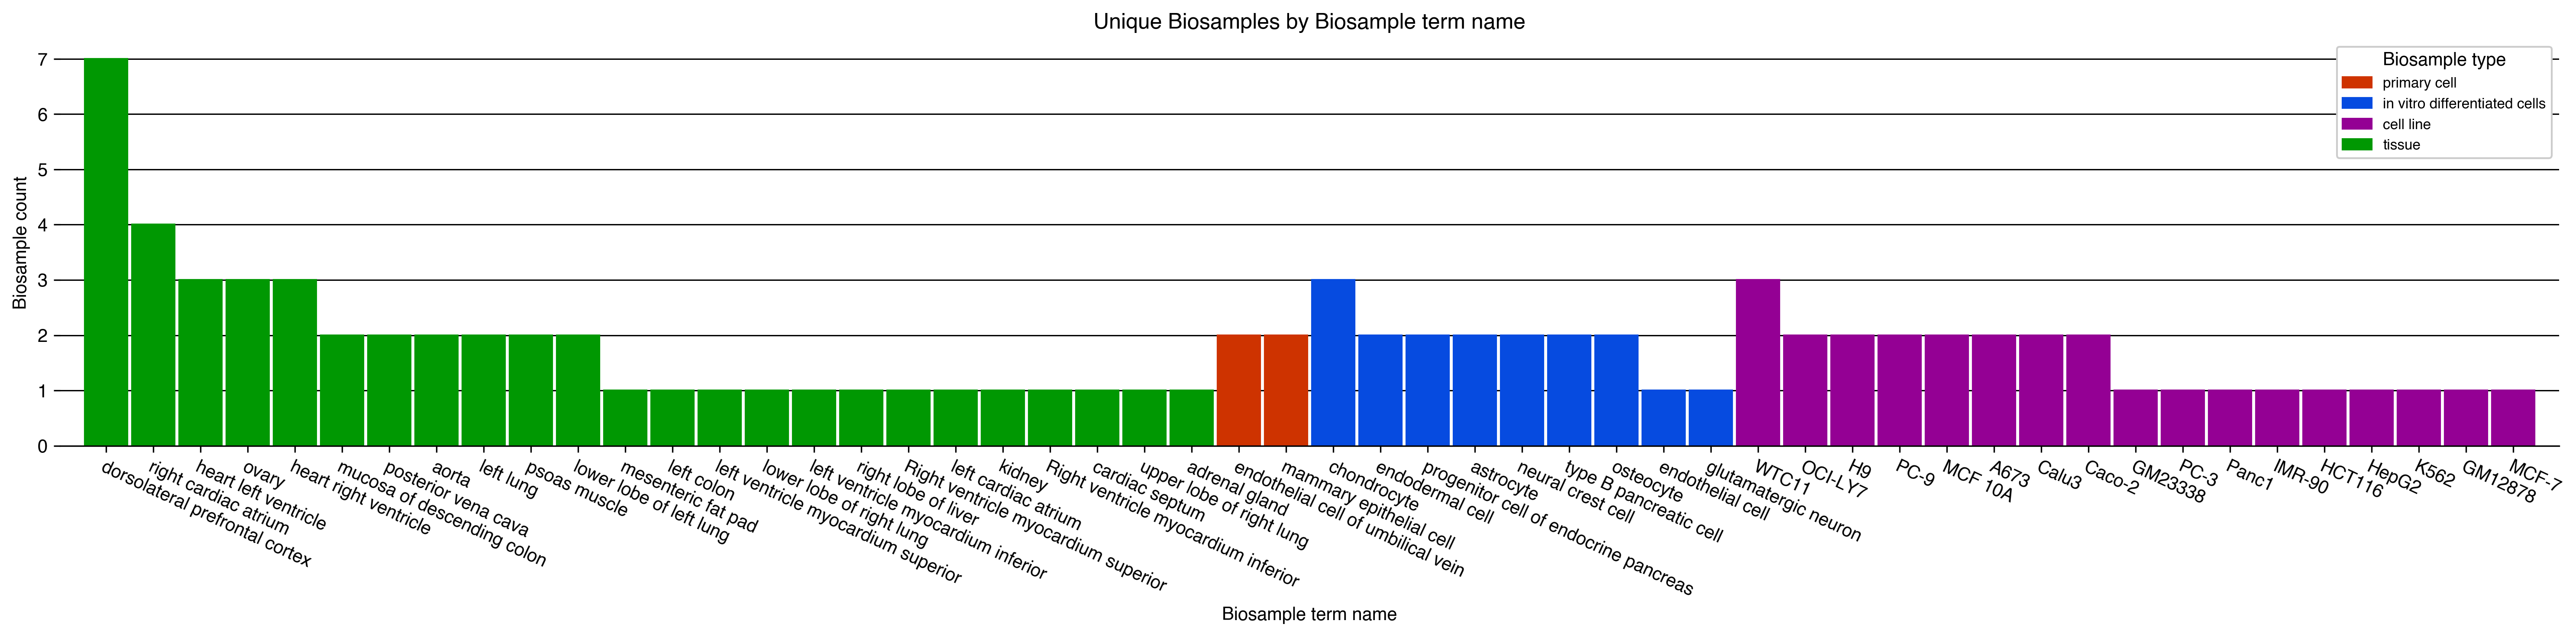

In [124]:
matched_experiments = pl.read_csv('golden_standard/biosample_matched_rna_seq_experiments.tsv', separator='\t')
df = matched_experiments.group_by('Biosample type', 'Biosample term name').agg(pl.col('Biosample accession').unique().len().alias('len')).sort('Biosample type', 'len', descending=True)
classifications = df['Biosample type'].unique().to_list()

plt.style.use('cowplot')
fig, ax = plt.subplots(figsize=(20, 5))
ax.spines['left'].set_visible(False)
ax.grid(axis='y', linestyle='-', linewidth=0.75, color='black')
bars = ax.bar(df['Biosample term name'], df['len'], width=0.9)

# Manual color assignment
color_map = {
    tissue: color for tissue, color in zip(classifications, ['#ce3300', '#064be0', '#940094', '#009802'])
}

# # Automatic color assignment
# cmap = plt.cm.tab10_r
# colors = cmap(np.linspace(0, 1, len(classifications)))
# color_map = {cls: colors[i] for i, cls in enumerate(classifications)}

for i, bar in enumerate(bars):
    # # Set face color (not edge color) to the color of the bar
    # bar.set_facecolor(color_map[df['biosample_ontology.classification'][i]])
    bar.set_color(color_map[df['Biosample type'][i]])

handles = [plt.Rectangle((0,0), 1, 1, color=color_map[cls]) for cls in classifications]
legend = ax.legend(handles=handles, labels=classifications, title="Biosample type")
legend.get_title().set_y(1.5)

# # Define 10% padding on the bottom of the y-axis
# y_ticks = ax.get_yticks()
# padding = y_ticks[1] * 0.1
# y_lim_min = y_ticks[0] - padding
# ax.set_ylim(bottom=y_lim_min)

plt.title('Unique Biosamples by Biosample term name')
plt.ylabel('Biosample count')
plt.xlabel('Biosample term name')

# Angle x-axis labels -25 degrees
plt.xticks(rotation=-25, ha='left', rotation_mode='anchor')
# # Angle x-axis labels by 90 degrees
# plt.xticks(rotation=90)

plt.tight_layout()
plt.savefig('golden_standard/biosamples_by_term.svg', format='svg')
plt.show()

Number of bam files per assay

In [120]:
display(matched_experiments['Assay'].value_counts())
print(matched_experiments['Biosample accession'].n_unique())

Assay,count
str,u32
"""long read RNA-seq""",101
"""total RNA-seq""",95


92


In [121]:
matched_experiments = pl.read_csv('golden_standard/biosample_matched_rna_seq_experiments.tsv', separator='\t').filter(
    pl.col('Assay') == 'long read RNA-seq'
)
print(f"Number of unique experiments: {matched_experiments['Experiment accession'].n_unique()}")
display(matched_experiments)

Number of unique experiments: 75


File accession,File format,File type,File format type,Output type,File assembly,Experiment accession,Assay,Donor(s),Biosample term id,Biosample term name,Biosample type,Biosample organism,Biosample treatments,Biosample treatments amount,Biosample treatments duration,Biosample genetic modifications methods,Biosample genetic modifications categories,Biosample genetic modifications targets,Biosample genetic modifications gene targets,Biosample genetic modifications site coordinates,Biosample genetic modifications zygosity,Experiment target,Library made from,Library depleted in,Library extraction method,Library lysis method,Library crosslinking method,Library strand specific,Experiment date released,Project,RBNS protein concentration,Library fragmentation method,Library size range,Biological replicate(s),Technical replicate(s),Read length,Mapped read length,Run type,Paired end,Paired with,Index of,Derived from,Size,Lab,md5sum,dbxrefs,File download URL,Genome annotation,Platform,Controlled by,File Status,s3_uri,Azure URL,File analysis title,File analysis status,Audit WARNING,Audit NOT_COMPLIANT,Audit ERROR,Biosample accession
str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,i64,str,str,i64,str,str,str,str,str,i64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""ENCFF564ONS""","""bam""","""bam""",null,"""alignments""","""GRCh38""","""ENCSR316ZTD""","""long read RNA-seq""","""/human-donors/ENCDO597SRH/""","""UBERON:0009834""","""dorsolateral prefrontal cortex""","""tissue""","""Homo sapiens""",null,null,null,null,null,null,null,null,null,null,"""polyadenylated mRNA""",null,null,null,null,"""forward""","""2022-04-07""","""ENCODE""",null,null,null,1,"""1_1""",null,null,null,null,null,null,"""/files/ENCFF983ETQ/, /files/EN…",535700690,"""ENCODE Processing Pipeline""","""8c1881b4a69a4474b9ab023b7d5dd1…",null,"""https://www.encodeproject.org/…","""V29""",null,null,"""released""","""s3://encode-public/2022/03/29/…","""https://datasetencode.blob.cor…","""ENCODE4 v2.0.0 GRCh38 V29""","""released""",null,null,null,"""ENCBS481WHG"""
"""ENCFF502LAB""","""bam""","""bam""",null,"""alignments""","""GRCh38""","""ENCSR700XDQ""","""long read RNA-seq""","""/human-donors/ENCDO411EVD/""","""UBERON:0002084""","""heart left ventricle""","""tissue""","""Homo sapiens""",null,null,null,null,null,null,null,null,null,null,"""polyadenylated mRNA""",null,null,null,null,"""unstranded""","""2021-02-20""","""ENCODE""",null,null,null,1,"""1_1""",null,null,null,null,null,null,"""/files/ENCFF795TPX/, /files/ge…",277375083,"""ENCODE Processing Pipeline""","""62b7556ed7a86bf7df879c723ba905…",null,"""https://www.encodeproject.org/…","""V29""",null,null,"""released""","""s3://encode-public/2021/01/23/…","""https://datasetencode.blob.cor…","""ENCODE4 v2.0.0 GRCh38 V29""","""released""",null,null,null,"""ENCBS914REQ"""
"""ENCFF623IBV""","""bam""","""bam""",null,"""alignments""","""GRCh38""","""ENCSR994YZY""","""long read RNA-seq""","""/human-donors/ENCDO392CRK/""","""UBERON:0002084""","""heart left ventricle""","""tissue""","""Homo sapiens""",null,null,null,null,null,null,null,null,null,null,"""polyadenylated mRNA""",null,null,null,null,"""unstranded""","""2021-02-20""","""ENCODE""",null,null,null,1,"""1_1""",null,null,null,null,null,null,"""/files/GRCh38_no_alt_analysis_…",241665333,"""ENCODE Processing Pipeline""","""b846db6aa176c46548395ff9ba4f3c…",null,"""https://www.encodeproject.org/…","""V29""",null,null,"""released""","""s3://encode-public/2021/01/23/…","""https://datasetencode.blob.cor…","""ENCODE4 v2.0.0 GRCh38 V29""","""released""",null,null,null,"""ENCBS756BZF"""
"""ENCFF899RYN""","""bam""","""bam""",null,"""alignments""","""GRCh38""","""ENCSR580IDG""","""long read RNA-seq""","""/human-donors/ENCDO000ACR/""","""EFO:0001099""","""Caco-2""","""cell line""","""Homo sapiens""",null,null,null,null,null,null,null,null,null,null,"""polyadenylated mRNA""",null,null,n

In [122]:
query_df = pl.read_csv('golden_standard/metadata.tsv', separator='\t').filter(
    pl.col('Assay') == 'long read RNA-seq',
    pl.col('File format') == 'bam',
    pl.col('Output type') == 'alignments',
)
print(f"Number of unique experiments: {query_df['Experiment accession'].n_unique()}")
display(query_df)

Number of unique experiments: 104


File accession,File format,File type,File format type,Output type,File assembly,Experiment accession,Assay,Donor(s),Biosample term id,Biosample term name,Biosample type,Biosample organism,Biosample treatments,Biosample treatments amount,Biosample treatments duration,Biosample genetic modifications methods,Biosample genetic modifications categories,Biosample genetic modifications targets,Biosample genetic modifications gene targets,Biosample genetic modifications site coordinates,Biosample genetic modifications zygosity,Experiment target,Library made from,Library depleted in,Library extraction method,Library lysis method,Library crosslinking method,Library strand specific,Experiment date released,Project,RBNS protein concentration,Library fragmentation method,Library size range,Biological replicate(s),Technical replicate(s),Read length,Mapped read length,Run type,Paired end,Paired with,Index of,Derived from,Size,Lab,md5sum,dbxrefs,File download URL,Genome annotation,Platform,Controlled by,File Status,s3_uri,Azure URL,File analysis title,File analysis status,Audit WARNING,Audit NOT_COMPLIANT,Audit ERROR
str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,i64,str,str,str,str,str,str,str,str,i64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""ENCFF114VSO""","""bam""","""bam""",null,"""alignments""","""GRCh38""","""ENCSR169YNI""","""long read RNA-seq""","""/human-donors/ENCDO218FFZ/""","""UBERON:0009834""","""dorsolateral prefrontal cortex""","""tissue""","""Homo sapiens""",null,null,null,null,null,null,null,null,null,null,"""polyadenylated mRNA""",null,null,null,null,"""forward""","""2022-04-07""","""ENCODE""",null,null,null,1,"""1_1""",null,null,null,null,null,null,"""/files/GRCh38_no_alt_analysis_…",317592661,"""ENCODE Processing Pipeline""","""3b5eabf1bcc046d207395362d8e4af…",null,"""https://www.encodeproject.org/…","""V29""",null,null,"""released""","""s3://encode-public/2022/04/05/…","""https://datasetencode.blob.cor…","""ENCODE4 v2.0.0 GRCh38 V29""","""released""",null,null,null
"""ENCFF294TRC""","""bam""","""bam""",null,"""alignments""","""GRCh38""","""ENCSR121FDE""","""long read RNA-seq""","""/human-donors/ENCDO000AAM/""","""EFO:0002793""","""HL-60""","""cell line""","""Homo sapiens""","""lipopolysaccharide, interferon…","""100 μM, 10 μM""","""12 hour, 120 hour""",null,null,null,null,null,null,null,"""polyadenylated mRNA""",null,null,null,null,"""forward""","""2022-02-17""","""ENCODE""",null,null,null,2,"""2_1""",null,null,null,null,null,null,"""/files/gencode.v29.primary_ass…",204726327,"""ENCODE Processing Pipeline""","""601324e09673ea207ada13e51c92be…",null,"""https://www.encodeproject.org/…","""V29""",null,null,"""released""","""s3://encode-public/2022/02/11/…","""https://datasetencode.blob.cor…","""ENCODE4 v2.0.0 GRCh38 V29""","""released""",null,null,null
"""ENCFF535QSI""","""bam""","""bam""",null,"""alignments""","""GRCh38""","""ENCSR121FDE""","""long read RNA-seq""","""/human-donors/ENCDO000AAM/""","""EFO:0002793""","""HL-60""","""cell line""","""Homo sapiens""","""lipopolysaccharide, interferon…","""100 μM, 10 μM""","""12 hour, 120 hour""",null,null,null,null,null,null,null,"""polyadenylated mRNA""",null,null,null,null,"""forward""","""2022-02-17""","""ENCODE""",null,null,null,1,"""1_1""",null,null,null,null,null,null,"""/files/gencode.v29.primary_ass…",211779065,"""ENCODE Processing Pipeline""","""d07dc3f8789db91c1ce6c7d7f4cf1b…",null,"""https://www.encodeproject.org/…","""V29""",null,null,"""released""","""s3://encode-public/2022/02/11/…","""https://datasetencode.blob.cor…","""ENCODE4 v2.0.0 GRCh38 V29""","""released""",null,null,null
"""ENCFF564ONS""","""bam""","""bam""",null,"""alignments""","""GRCh38""","""ENCSR316ZTD""","""long read RNA-seq""","""/human-donors/ENCDO597SRH/""","""UBERON:0009834""","""dorsolateral prefrontal cortex""","""tissue""","""Homo sapiens""",null,null,null,null,null,null,null,null,null,nu

In [127]:
my_df_tuple = matched_experiments.select('File accession', 'Biosample term name')
query_df_tuple = query_df.select('File accession', 'Biosample term name')

matches = query_df_tuple.join(my_df_tuple, on='File accession', how='inner')
mismatches = query_df_tuple.join(my_df_tuple, on='File accession', how='anti')
mismatches.write_csv('golden_standard/mismatches.tsv', separator='\t')

display(matches)
display(mismatches)

File accession,Biosample term name,Biosample term name_right
str,str,str
"""ENCFF564ONS""","""dorsolateral prefrontal cortex""","""dorsolateral prefrontal cortex"""
"""ENCFF502LAB""","""heart left ventricle""","""heart left ventricle"""
"""ENCFF623IBV""","""heart left ventricle""","""heart left ventricle"""
"""ENCFF899RYN""","""Caco-2""","""Caco-2"""
"""ENCFF835KGV""","""Caco-2""","""Caco-2"""
…,…,…
"""ENCFF901XCR""","""neural crest cell""","""neural crest cell"""
"""ENCFF305AFY""","""heart right ventricle""","""heart right ventricle"""
"""ENCFF222UTL""","""dorsolateral prefrontal cortex""","""dorsolateral prefrontal cortex"""


File accession,Biosample term name
str,str
"""ENCFF114VSO""","""dorsolateral prefrontal cortex"""
"""ENCFF294TRC""","""HL-60"""
"""ENCFF535QSI""","""HL-60"""
"""ENCFF215GZH""","""HL-60"""
"""ENCFF945VII""","""HL-60"""
…,…
"""ENCFF810FRP""","""HL-60"""
"""ENCFF600MGT""","""HL-60"""
"""ENCFF678TEN""","""dorsolateral prefrontal cortex"""


After checking the mismatches, it seems some biosmaples have processed long read RNA-seq data, but the corresponding total RNA-seq has not been processed by the ENCODE pipeline.

Some were matched with micro RNA-seq data, but not total RNA-seq.

Some were soley long read RNA-seq with no matched RNA-seq experiments.

~~I have to de-duplicate the experiments. If, for example, they were proessed in ENCODE4 and ENCODE4 v2.0.0, I'll keep the most up to date one. Okay JK, they are not duplicated, it's just that experiments that were only processsed in ENCODE4 v2.0.0 or whatever are not included.~~